Markov Transition Field

In [1]:
#!pip install pyts

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyts.image import MarkovTransitionField


In [46]:
filename = '/Users/palhares/Documents/msc/PTT-PPG-PhysioNet/physionet.org/files/pulse-transit-time-ppg/1.1.0/csv/s2_sit.csv'
df = pd.read_csv(filename)

In [47]:
df

,time,ecg,peaks,pleth_1,pleth_2,pleth_3,pleth_4,pleth_5,pleth_6,lc_1,lc_2,temp_1,temp_2,temp_3,a_x,a_y,a_z,g_x,g_y,g_z
0,2021-01-01 15:14:41.324938,31256,0,75338,75758,4866,82950,92726,4332,6320680,5731813,37.31,39.50,36.224487,8.602206,-3.817749,-2.365592,-0.005860,-0.001790,-0.004309
1,2021-01-01 15:14:41.326938,31204,0,75338,75758,4866,82954,92746,4337,6320680,5731813,37.31,39.50,36.224487,8.590235,-3.812362,-2.371578,-0.006127,-0.001790,-0.002844
2,2021-01-01 15:14:41.328938,31199,0,75343,75769,4872,82974,92753,4332,6325330,5738633,37.31,39.50,36.218498,8.586643,-3.818946,-2.388937,-0.005994,-0.001790,-0.001646
3,2021-01-01 15:14:41.330938,31243,0,75348,75763,4871,82974,92753,4332,6325330,5738633,37.31,39.50,36.218498,8.576468,-3.829122,-2.400908,-0.005461,-0.002322,0.000218
4,2021-01-01 15:14:41.332938,31245,0,75352,75766,4883,82973,92761,4340,6325330,5738633,37.31,39.50,36.221493,8.571679,-3.829122,-2.419464,-0.005727,-0.003521,0.002482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246201,2021-01-01 15:22:53.726941,29059,0,74529,74869,4466,82611,91871,4063,6568472,5870981,38.31,40.69,38.273190,8.478300,-4.144574,-2.299149,-0.005860,-0.000059,0.009140
246202,2021-01-01 15:22:53.728941,31036,0,74529,74869,4466,82605,91874,4067,6568472,5870981,38.31,40.69,38.276184,8.467525,-4.134997,-2.308727,-0.001466,-0.001390,0.013002
246203,2021-01-01 15:22:53.730941,34134,0,74535,74862,4467,82608,91860,4069,6568472,5870981,38.31,40.69,38.276184,8.450766,-4.127215,-2.325487,0.003061,-0.003121,0.016730
246204,2021-01-01 15:22:53.732941,38385,0,74529,74874,4467,82595,91869,4062,6568472,5870981,38.31,40.69,38.279182,8.447773,-4.118237,-2.337459,0.005725,-0.004453,0.020059


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246206 entries, 0 to 246205
Data columns (total 20 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   time     246206 non-null  object 
 1   ecg      246206 non-null  int64  
 2   peaks    246206 non-null  int64  
 3   pleth_1  246206 non-null  int64  
 4   pleth_2  246206 non-null  int64  
 5   pleth_3  246206 non-null  int64  
 6   pleth_4  246206 non-null  int64  
 7   pleth_5  246206 non-null  int64  
 8   pleth_6  246206 non-null  int64  
 9   lc_1     246206 non-null  int64  
 10  lc_2     246206 non-null  int64  
 11  temp_1   246206 non-null  float64
 12  temp_2   246206 non-null  float64
 13  temp_3   246206 non-null  float64
 14  a_x      246206 non-null  float64
 15  a_y      246206 non-null  float64
 16  a_z      246206 non-null  float64
 17  g_x      246206 non-null  float64
 18  g_y      246206 non-null  float64
 19  g_z      246206 non-null  float64
dtypes: float64(9), int64(10), 

In [64]:
column_name = 'a_y'
max_rows = 1000
X = df[column_name].values[:max_rows].reshape(1, -1)

In [65]:
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

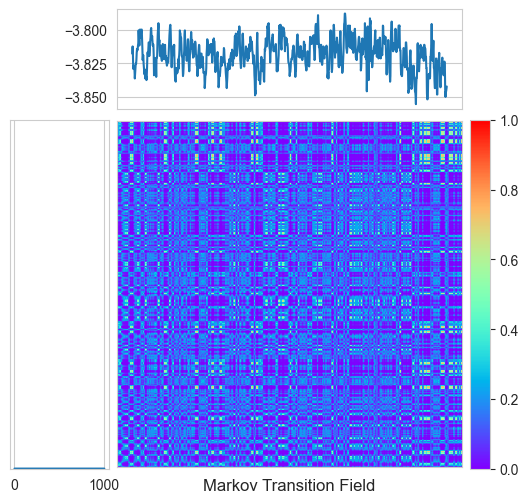

In [66]:
width_ratios = (2, 7, 0.4)
height_ratios = (2, 7)
width = 6
height = width * sum(height_ratios) / sum(width_ratios)
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 3,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

time_ticks = np.linspace(0, max_rows, 9)
time_ticklabels = [str(int(i)) for i in np.linspace(0, max_rows, 9)]
value_ticks = [0, 1]

ax_left = fig.add_subplot(gs[1, 0])
#ax_left.imshow(X.T, cmap='viridis', origin='upper', aspect='auto', extent=[0, 1, 0, max_rows])
ax_left.plot(X[0])
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels)
ax_left.set_yticks([])

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(X[0])
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_xticks([])

ax_mtf = fig.add_subplot(gs[1, 1])
im = ax_mtf.imshow(X_mtf[0], cmap='rainbow', origin='lower', vmin=0., vmax=1.,
                   extent=[0, max_rows, 0, max_rows])
ax_mtf.set_xticks([])
ax_mtf.set_yticks([])
ax_mtf.set_title('Markov Transition Field', y=-0.09)

ax_cbar = fig.add_subplot(gs[1, 2])
fig.colorbar(im, cax=ax_cbar)

plt.show()

# POST OP PLOT

In [38]:
filename = '/Users/palhares/Documents/msc/PTT-PPG-PhysioNet/output_262.csv'
df = pd.read_csv(filename)

In [39]:
df

,II,MCL1,V,ABP,PAP
0,-0.023299,-0.061399,-0.047221,72.796209,30.750
1,0.016775,-0.073906,-0.051818,71.232227,30.225
2,-0.090401,0.013076,-0.040535,69.715640,30.125
3,-0.141659,0.050597,-0.022148,68.246445,30.525
4,-0.125815,0.044343,-0.033431,66.919431,30.950
...,...,...,...,...,...
19199995,-0.105312,-0.039227,-0.038028,113.270142,42.300
19199996,-0.105312,-0.055145,-0.058922,112.985782,41.825
19199997,-0.131407,-0.042638,-0.054325,112.654028,41.175
19199998,-0.095061,-0.055145,-0.070205,112.274882,40.350


In [43]:
column_name = 'PAP'
max_rows = 500
X = df[column_name].values[:max_rows].reshape(1, -1)

In [44]:
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

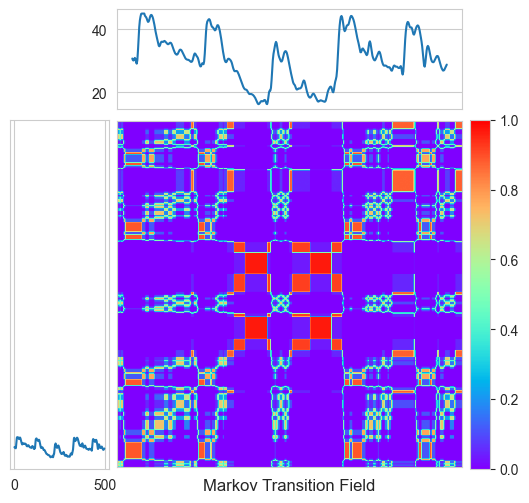

In [45]:
width_ratios = (2, 7, 0.4)
height_ratios = (2, 7)
width = 6
height = width * sum(height_ratios) / sum(width_ratios)
fig = plt.figure(figsize=(width, height))
gs = fig.add_gridspec(2, 3,  width_ratios=width_ratios,
                      height_ratios=height_ratios,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

time_ticks = np.linspace(0, max_rows, 9)
time_ticklabels = [str(int(i)) for i in np.linspace(0, max_rows, 9)]
value_ticks = [0, 1]

ax_left = fig.add_subplot(gs[1, 0])
#ax_left.imshow(X.T, cmap='viridis', origin='upper', aspect='auto', extent=[0, 1, 0, max_rows])
ax_left.plot(X[0])
ax_left.set_yticks(time_ticks)
ax_left.set_yticklabels(time_ticklabels)
ax_left.set_yticks([])

ax_top = fig.add_subplot(gs[0, 1])
ax_top.plot(X[0])
ax_top.set_xticks(time_ticks)
ax_top.set_xticklabels(time_ticklabels)
ax_top.set_xticks([])

ax_mtf = fig.add_subplot(gs[1, 1])
im = ax_mtf.imshow(X_mtf[0], cmap='rainbow', origin='lower', vmin=0., vmax=1.,
                   extent=[0, max_rows, 0, max_rows])
ax_mtf.set_xticks([])
ax_mtf.set_yticks([])
ax_mtf.set_title('Markov Transition Field', y=-0.09)

ax_cbar = fig.add_subplot(gs[1, 2])
fig.colorbar(im, cax=ax_cbar)

plt.show()